# YahooファイナンスからのFX時間足データ取得

In [1]:
import pandas as pd
import mplfinance as mpf
import yfinance as yf
import pandas_ta as ta
import datetime
from datetime import timedelta
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [2]:
# Yahoo! Financeからデータをダウンロード
pair = 'USDJPY=X'
#end = datetime.datetime.now(datetime.UTC)  #標準時が必要な場合
end = datetime.datetime.now()
start = end - timedelta(days=7)
end_date = end.strftime('%Y-%m-%d')
start_date = start.strftime('%Y-%m-%d')
data1 = yf.download(pair, start=start_date, end=end_date, interval="1m", period="1d")
data2 = yf.download(pair, interval="1m", period="1d")
data = pd.concat([data1,data2])

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


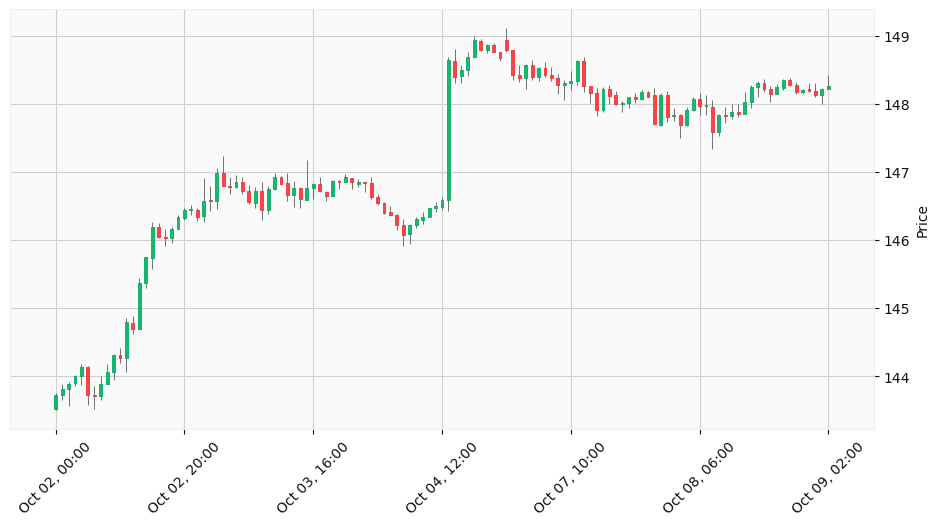

In [3]:
# データのリサンプリング
hourly_data = data.resample('60min').agg({'Open':'first', 'High':'max', 'Low':'min', 'Close':'last'})
# 重複行があれば削除し、チャートを途切れなくするため欠損値を除外
df = hourly_data.drop_duplicates().dropna()
# チャート描画
mpf.plot(df,type='candle',figsize =(12,6), style='yahoo')